# Task 1: Preprocess and Explore the Data

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
import sys
import os
sys.path.append(os.path.abspath("../Scripts"))

import warnings
warnings.filterwarnings('ignore')

In [5]:
    # Parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

In [6]:
from load_stock_data import *

In [9]:
    # Download portfolio data
df = download_data(tickers, start_date, end_date)
print(f"Downloading {tickers} from {start_date} to {end_date} ...")
df.head()

Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816715  174.917130  17.943333  60.914441  175.363905   
2015-07-02  60.967094  174.756989  18.667999  61.027236  175.566249   
2015-07-06  61.177586  174.259598  18.648001  61.222695  175.043557   
2015-07-07  61.237724  175.355438  17.858667  61.470766  175.481879   
2015-07-08  61.410645  172.413498  16.997334  61.463267  174.293327   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764093  174.124732  17.856667  60.794164   
2015-07-02  18.830000  60.937024  174.335501  18.220667  60.937024   
2015-07-06  18.779333  61.057308  173.256457  18.420000  61.222695   
2015-07-07  18.346666  61.237724  172.059407  17.384666  61.410630   
2015-07-08  17.386667  61.312913  172.177466  16.954000  61.373055   

Price                               Volume                        
Ticker             SPY       TSLA      BND        SPY       TSLA  
Date                                                              
2015-07-01  175.111010  18.073999  5399300  135979900   31518000  
2015-07-02  175.397657  18.680000  1060100  104373700  107458500  
2015-07-06  173.458775  18.591999  2210700  117975400   61828500  
2015-07-07  174.461888  18.333332  4183200  173820200   91576500  
2015-07-08  174.006719  17.288000  1967800  164020100   93316500

In [13]:
# Suppose df is your stock prices DataFrame
clean_df = clean_data(df)
display(clean_df.head())

Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816715  174.917130  17.943333  60.914441  175.363905   
2015-07-02  60.967094  174.756989  18.667999  61.027236  175.566249   
2015-07-06  61.177586  174.259598  18.648001  61.222695  175.043557   
2015-07-07  61.237724  175.355438  17.858667  61.470766  175.481879   
2015-07-08  61.410645  172.413498  16.997334  61.463267  174.293327   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764093  174.124732  17.856667  60.794164   
2015-07-02  18.830000  60.937024  174.335501  18.220667  60.937024   
2015-07-06  18.779333  61.057308  173.256457  18.420000  61.222695   
2015-07-07  18.346666  61.237724  172.059407  17.384666  61.410630   
2015-07-08  17.386667  61.312913  172.177466  16.954000  61.373055   

Price                               Volume                        
Ticker             SPY       TSLA      BND        SPY       TSLA  
Date                                                              
2015-07-01  175.111010  18.073999  5399300  135979900   31518000  
2015-07-02  175.397657  18.680000  1060100  104373700  107458500  
2015-07-06  173.458775  18.591999  2210700  117975400   61828500  
2015-07-07  174.461888  18.333332  4183200  173820200   91576500  
2015-07-08  174.006719  17.288000  1967800  164020100   93316500

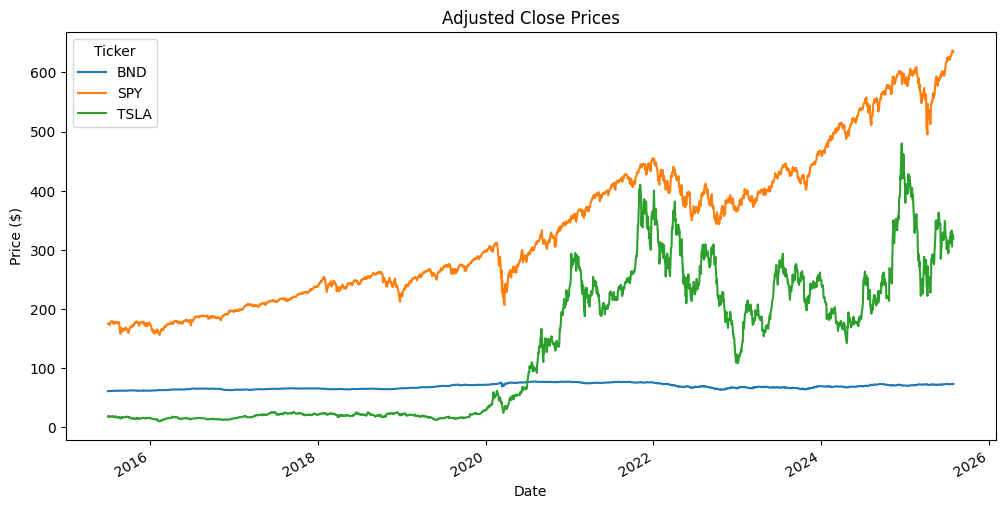

In [34]:
plot_prices(df['Close'])

In [14]:
# Suppose df is your stock prices DataFrame
clean_df = clean_data(df.isnull().sum())
display(clean_df.head())

Price  Ticker
Close  BND       0
       SPY       0
       TSLA      0
High   BND       0
       SPY       0
dtype: int64

Basic Statistics:


count          mean           std           min           25%  \
Price  Ticker                                                                   
Close  BND     2535.0  6.846919e+01  4.554601e+00  6.077915e+01  6.465434e+01   
       SPY     2535.0  3.341937e+02  1.264277e+02  1.558698e+02  2.300832e+02   
       TSLA    2535.0  1.319630e+02  1.209149e+02  9.578000e+00  1.896767e+01   
High   BND     2535.0  6.857117e+01  4.563590e+00  6.089943e+01  6.473123e+01   
       SPY     2535.0  3.359816e+02  1.270531e+02  1.569267e+02  2.340249e+02   
       TSLA    2535.0  1.349604e+02  1.237837e+02  1.033133e+01  1.927967e+01   
Low    BND     2535.0  6.836492e+01  4.544724e+00  6.076409e+01  6.457067e+01   
       SPY     2535.0  3.321146e+02  1.256613e+02  1.537585e+02  2.286618e+02   
       TSLA    2535.0  1.288378e+02  1.179966e+02  9.403333e+00  1.857533e+01   
Open   BND     2535.0  6.847139e+01  4.555994e+00  6.078667e+01  6.466057e+01   
       SPY     2535.0  3.341255e+02  1.263911e+02  1.554265e+02  2.310078e+02   
       TSLA    2535.0  1.320006e+02  1.210342e+02  9.488000e+00  1.890100e+01   
Volume BND     2535.0  4.434376e+06  2.899511e+06  0.000000e+00  2.182050e+06   
       SPY     2535.0  8.503521e+07  4.428796e+07  2.027000e+07  5.779150e+07   
       TSLA    2535.0  1.141789e+08  7.332146e+07  1.062000e+07  6.908220e+07   

                        50%           75%           max  
Price  Ticker                                            
Close  BND     6.760487e+01  7.189113e+01  7.731824e+01  
       SPY     3.052645e+02  4.203505e+02  6.371000e+02  
       TSLA    9.457133e+01  2.367617e+02  4.798600e+02  
High   BND     6.774936e+01  7.201894e+01  7.741328e+01  
       SPY     3.061435e+02  4.231149e+02  6.386700e+02  
       TSLA    9.766666e+01  2.408817e+02  4.885400e+02  
Low    BND     6.747405e+01  7.178070e+01  7.728368e+01  
       SPY     3.020331e+02  4.177545e+02  6.355400e+02  
       TSLA    9.173400e+01  2.321700e+02  4.575100e+02  
Open   BND     6.758906e+01  7.188619e+01  7.737873e+01  
       SPY     3.047149e+02  4.201175e+02  6.383500e+02  
       TSLA    9.440067e+01  2.358517e+02  4.759000e+02  
Volume BND     4.121100e+06  5.890100e+06  3.396300e+07  
       SPY     7.451530e+07  9.789180e+07  5.072443e+08  
       TSLA    9.537450e+07  1.322551e+08  9.140820e+08

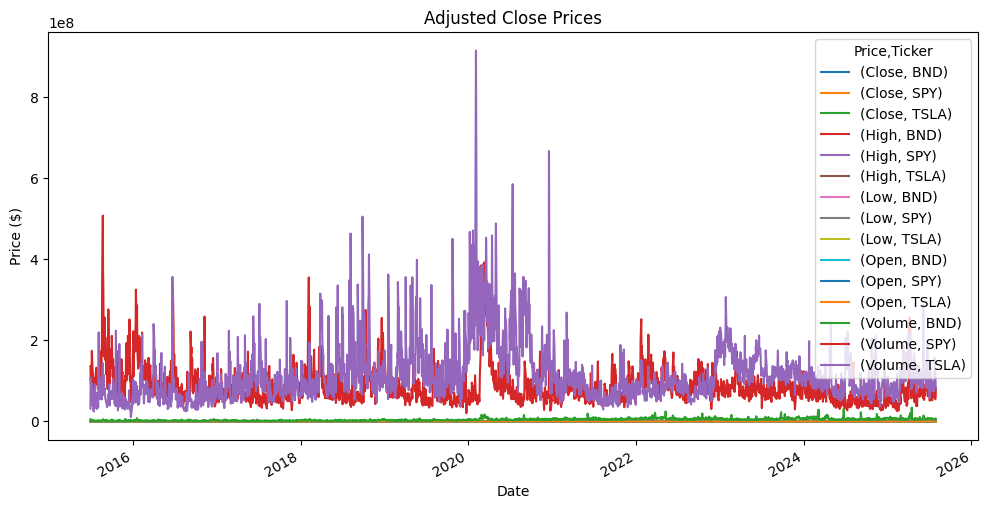

In [17]:
# Basic Stats and Visualization
basic_stats(df)
plot_prices(df)

In [19]:
df['Close'].describe().T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
BND,2535.0,68.469188,4.554601,60.779152,64.654339,67.604874,71.891129,77.318245
SPY,2535.0,334.193733,126.427704,155.869751,230.083183,305.264465,420.350494,637.099976
TSLA,2535.0,131.963002,120.914904,9.578000,18.967667,94.571335,236.761665,479.859985


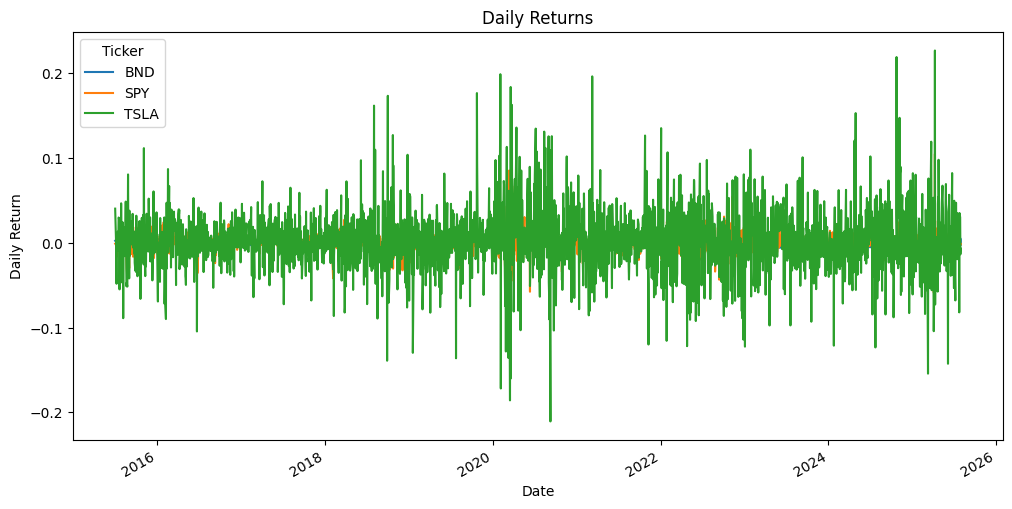

In [21]:
    # Calculate returns and plot
returns = daily_returns(df['Close'])
plot_returns(returns)

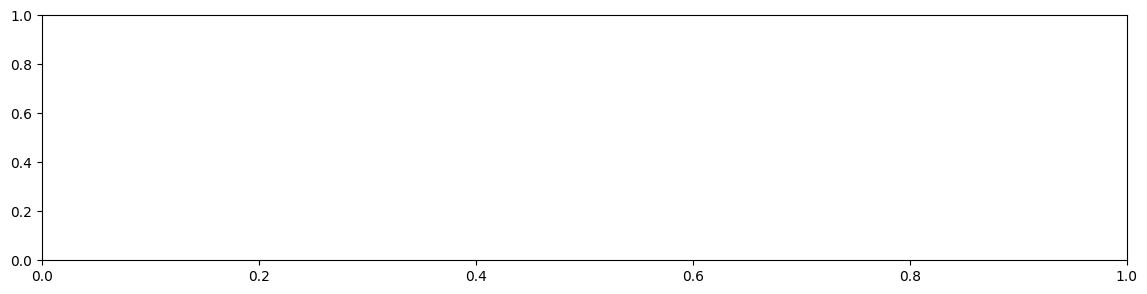

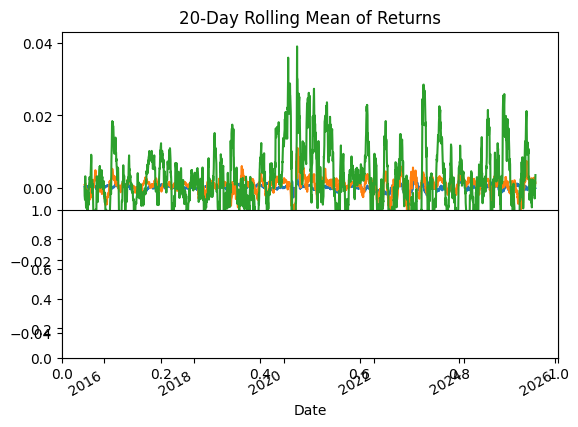

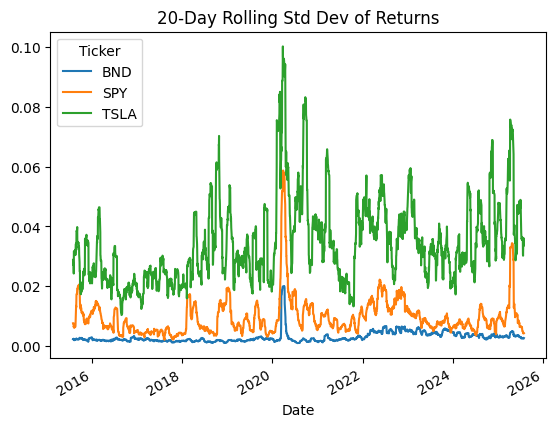

In [25]:
  # Rolling stats
rolling_mean, rolling_std = rolling_stats(returns)

In [48]:
# Outlier detection
outliers = detect_outliers(returns)
for ticker in tickers:
    n_outliers = outliers[ticker].sum()
    print(f"Number of outlier days detected for {ticker}: {n_outliers}")

Number of outlier days detected for TSLA: 41
Number of outlier days detected for BND: 26
Number of outlier days detected for SPY: 35


In [53]:
# Detect outliers (returns is your daily returns DataFrame)
outliers = detect_outliers(returns)

# Create a copy to modify
returns_clean = returns.copy()

# Replace outliers with zero for each asset individually
returns_clean[outliers] = 0.0

# Confirm no outliers remain after replacement
for ticker in returns_clean.columns:
    n_outliers_after = detect_outliers(returns_clean)[ticker].isnull().sum()
    print(f"Outliers remaining after cleaning for {ticker}: {n_outliers_after}")

Outliers remaining after cleaning for BND: 0
Outliers remaining after cleaning for SPY: 0
Outliers remaining after cleaning for TSLA: 0


In [42]:
# Stationarity tests
prices_clean = clean_data(df['Close'])
for ticker in tickers:
    adf_test(prices_clean[ticker], f"{ticker} Price")
    adf_test(returns[ticker], f"{ticker} Returns")



ADF Test for TSLA Price:
ADF Statistic: -1.4189
p-value: 0.5732
Critical Value (1%): -3.4330
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Result: TSLA Price is non-stationary (fail to reject H0)

ADF Test for TSLA Returns:
ADF Statistic: -34.6811
p-value: 0.0000
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Result: TSLA Returns is stationary (reject H0)

ADF Test for BND Price:
ADF Statistic: -1.5363
p-value: 0.5155
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Result: BND Price is non-stationary (fail to reject H0)

ADF Test for BND Returns:
ADF Statistic: -9.8898
p-value: 0.0000
Critical Value (1%): -3.4330
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Result: BND Returns is stationary (reject H0)

ADF Test for SPY Price:
ADF Statistic: 0.6908
p-value: 0.9897
Critical Value (1%): -3.4329
Critical Value (5%): -2.8627
Critical Value (10%): -2.5674
Result: SPY Price is non-sta

In [44]:
  # Risk metrics
var = calculate_var(returns)
for ticker in tickers:
    sr = sharpe_ratio(returns[ticker])
    print(f"Sharpe Ratio for {ticker}: {sr:.4f}")


Value at Risk (VaR) at 95% confidence level:
Ticker
BND    -0.004900
SPY    -0.017195
TSLA   -0.054663
Name: 0.05, dtype: float64
Sharpe Ratio for TSLA: 0.7783
Sharpe Ratio for BND: 0.3569
Sharpe Ratio for SPY: 0.7941
